In [74]:
import numpy, scipy
import matplotlib.pyplot as mp
import netCDF4
import mpl_toolkits
from mpl_toolkits import basemap
import scipy.stats
import time

% matplotlib inline

In [2]:
# file lists for PRECC
PRECC_file_list_hist = numpy.array(( \
'b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.PRECC.185001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.010.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.011.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.012.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.013.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.014.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.015.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.016.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.017.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.018.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.019.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.020.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.021.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.022.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.023.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.024.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.025.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.026.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.027.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.028.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.029.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.030.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.031.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.032.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.033.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.034.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.035.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.101.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.102.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.103.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.104.cam.h0.PRECC.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.105.cam.h0.PRECC.192001-200512_CA_REGION.nc' ))

PRECC_file_list_rcp = numpy.array(( \
'b.e11.BRCP85C5CNBDRD.f09_g16.001.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.002.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.003.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.004.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.005.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.006.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.007.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.008.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.009.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.010.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.011.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.012.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.013.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.014.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.015.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.016.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.017.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.018.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.019.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.020.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.021.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.022.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.023.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.024.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.025.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.026.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.027.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.028.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.029.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.030.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.032.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.033.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.034.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.035.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.101.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.102.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.103.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.104.cam.h0.PRECC.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.105.cam.h0.PRECC.200601-210012_CA_REGION.nc' ))

PRECC_file_pic = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.PRECC.040001-220012_CA_REGION.nc'

In [3]:
# file lists for PRECL
PRECL_file_list_hist = numpy.array(( \
'b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.PRECL.185001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.010.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.011.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.012.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.013.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.014.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.015.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.016.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.017.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.018.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.019.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.020.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.021.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.022.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.023.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.024.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.025.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.026.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.027.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.028.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.029.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.030.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.031.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.032.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.033.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.034.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.035.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.101.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.102.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.103.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.104.cam.h0.PRECL.192001-200512_CA_REGION.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.105.cam.h0.PRECL.192001-200512_CA_REGION.nc' ))

PRECL_file_list_rcp = numpy.array(( \
'b.e11.BRCP85C5CNBDRD.f09_g16.001.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.002.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.003.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.004.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.005.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.006.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.007.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.008.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.009.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.010.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.011.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.012.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.013.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.014.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.015.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.016.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.017.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.018.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.019.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.020.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.021.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.022.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.023.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.024.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.025.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.026.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.027.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.028.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.029.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.030.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.032.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.033.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.034.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.035.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.101.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.102.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.103.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.104.cam.h0.PRECL.200601-210012_CA_REGION.nc', \
'b.e11.BRCP85C5CNBDRD.f09_g16.105.cam.h0.PRECL.200601-210012_CA_REGION.nc' ))

PRECL_file_pic = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.PRECL.040001-220012_CA_REGION.nc'

# Import historical PRECC and PRECL

In [4]:
# import PRECC for historical
data_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/monthly/PRECC/B20TRC5CNBDRD_CA_REGION/'
PRECC_list_hist = []
for i in range(PRECC_file_list_hist.size):
    ncfile = netCDF4.Dataset(data_dir + PRECC_file_list_hist[i], 'r', 'NETCDF4')
    PRECC_list_hist.append(ncfile.variables['PRECC'][:])
    if i==0:
        PRECC_hist_time_var_zero = ncfile.variables['time']
PRECC_hist_time_var = ncfile.variables['time']

data_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/monthly/PRECL/B20TRC5CNBDRD_CA_REGION/'
PRECL_list_hist = []
for i in range(PRECL_file_list_hist.size):
    ncfile = netCDF4.Dataset(data_dir + PRECL_file_list_hist[i], 'r', 'NETCDF4')
    PRECL_list_hist.append(ncfile.variables['PRECL'][:])

model_lat = ncfile.variables['lat'][:]
model_lon = ncfile.variables['lon'][:]

# Import RCP8.5 PRECC and PRECL

In [5]:
# import PRECC for historical
data_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/monthly/PRECC/BRCP85C5CNBDRD_CA_REGION/'
PRECC_list_rcp = []
for i in range(PRECC_file_list_rcp.size):
    ncfile = netCDF4.Dataset(data_dir + PRECC_file_list_rcp[i], 'r', 'NETCDF4')
    PRECC_list_rcp.append(ncfile.variables['PRECC'][:])
PRECC_rcp_time_var = ncfile.variables['time']

data_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/monthly/PRECL/BRCP85C5CNBDRD_CA_REGION/'
PRECL_list_rcp = []
for i in range(PRECL_file_list_rcp.size):
    ncfile = netCDF4.Dataset(data_dir + PRECL_file_list_rcp[i], 'r', 'NETCDF4')
    PRECL_list_rcp.append(ncfile.variables['PRECL'][:])

# Import preindustrial control PRECC and PRECL

In [6]:
# import PRECC for historical
data_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/monthly/PRECC/B1850C5CN_CA_REGION/'
ncfile = netCDF4.Dataset(data_dir + PRECC_file_pic, 'r', 'NETCDF4')
PRECC_pic = ncfile.variables['PRECC'][:]
PRECC_pic_time_var = ncfile.variables['time']

# import PRECL for preindustrial control
data_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/monthly/PRECL/B1850C5CN_CA_REGION/'
ncfile = netCDF4.Dataset(data_dir + PRECL_file_pic, 'r', 'NETCDF4')
PRECL_pic = ncfile.variables['PRECL'][:]

In [29]:
PRECT_list_hist = [PRECC_list_hist[i]*86400.*1000.+PRECL_list_hist[i]*86400.*1000. for i in range(len(PRECC_list_hist))]
PRECT_list_rcp = [PRECC_list_rcp[i]*86400.*1000.+PRECL_list_rcp[i]*86400.*1000. for i in range(len(PRECC_list_rcp))]

# Calculate time indices

In [30]:
# seasons
months_NDJFM = [11,12,1,2,3]

hist_start = 1970
hist_end = 2000
rcp_start = 2070
rcp_end = 2100

hist_time_var_converted = netCDF4.num2date(PRECC_hist_time_var[:], PRECC_hist_time_var.units, PRECC_hist_time_var.calendar)
hist_time_var_zero_converted = netCDF4.num2date(PRECC_hist_time_var_zero[:], PRECC_hist_time_var_zero.units, PRECC_hist_time_var_zero.calendar)
rcp_time_var_converted = netCDF4.num2date(PRECC_rcp_time_var[:], PRECC_rcp_time_var.units, PRECC_rcp_time_var.calendar)
#pic_time_var_converted = netCDF4.num2date(PRECC_pic_time_var[:], PRECC_pic_time_var.units, PRECC_pic_time_var.calendar)

time_indices_hist_zero_NDJFM = numpy.array(([(i.month in months_NDJFM)&(i.year in range(hist_start,hist_end+1)) for i in hist_time_var_zero_converted]))
time_indices_hist_NDJFM = numpy.array(([(i.month in months_NDJFM)&(i.year in range(hist_start,hist_end+1)) for i in hist_time_var_converted]))
time_indices_rcp_NDJFM = numpy.array(([(i.month in months_NDJFM)&(i.year in range(rcp_start,rcp_end+1)) for i in rcp_time_var_converted]))

# Calculate climatologies

In [62]:
hist_NDJFM_clim = []
rcp_NDJFM_clim = []

for i in range(len(PRECT_list_hist)):
    if i==0:
        hist_NDJFM_clim.append( numpy.mean(PRECT_list_hist[i][time_indices_hist_zero_NDJFM,:,:], axis=0) )
    else:
        hist_NDJFM_clim.append( numpy.mean(PRECT_list_hist[i][time_indices_hist_NDJFM,:,:], axis=0) )

    rcp_NDJFM_clim.append( numpy.mean(PRECT_list_rcp[i][time_indices_rcp_NDJFM,:,:], axis=0) )

# Calculate significance test for difference in mean of climatologies

In [83]:
collect_hist = []
collect_rcp = []
for i in range(len(PRECT_list_hist)):
    if i==0:
        collect_hist.append(PRECT_list_hist[i][time_indices_hist_zero_NDJFM,:,:])
    else:
        collect_hist.append(PRECT_list_hist[i][time_indices_hist_NDJFM,:,:])
    
    collect_rcp.append(PRECT_list_rcp[i][time_indices_rcp_NDJFM,:,:])

# string all daily data together for each latitude, longitude grid point
all_data_hist = numpy.zeros((0,model_lat.size,model_lon.size))
all_data_rcp = numpy.zeros((0,model_lat.size,model_lon.size))
for i in range(len(PRECT_list_hist)):
    #print(all_data_hist.shape)
    #print(collect_hist[i].shape)
    all_data_hist = numpy.vstack((all_data_hist, collect_hist[i]))
    all_data_rcp = numpy.vstack((all_data_rcp, collect_rcp[i]))

# now do ttest_ind for pvals calculations
#pvals_array = numpy.zeros((model_lat.size, model_lon.size))
#pvals_array = scipy.stats.ttest_ind(all_data_hist, all_data_rcp, axis=0)[1]
pvals_array = scipy.stats.ttest_ind(all_data_hist, all_data_rcp, equal_var=False, axis=0)[1]

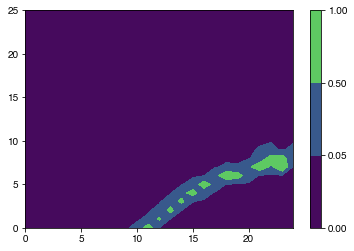

In [84]:
cf = mp.contourf(pvals_array, levels=[0,0.05,0.5,1.0])
mp.colorbar(cf)

# Plot MMEM climatologies

In [85]:
hist_NDJFM_clim = numpy.array(hist_NDJFM_clim)
hist_mmem_clim = numpy.mean(hist_NDJFM_clim, axis=0)

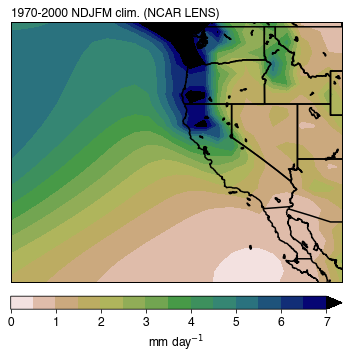

In [86]:
fontsize=12
contour_levels = numpy.arange(0,7.1,0.5)

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)

map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=model_lat.min(),urcrnrlat=model_lat.max(),llcrnrlon=model_lon.min(),urcrnrlon=model_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
#map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(model_lon, model_lat)
xi,yi = map(lons, lats)

mp.rcParams['hatch.color'] = '0.5'
#pr_map = map.pcolormesh(xi, yi, hist_mmem_clim, cmap='RdBu', zorder=2, vmin=0, vmax=40, ax=ax, latlon=True)
pr_map = map.contourf(xi, yi, hist_mmem_clim, \
                      cmap='gist_earth_r', zorder=2, \
                      levels=contour_levels, \
                      extend='max', \
                      ax=ax, latlon=True)
#pr_stipple = map.contourf(xi, yi, agreement_positive, colors='None', hatches=['..',None,'..'], levels=[-0.5,2.5,37.5,40.5], zorder=2)
#colors='none', levels=[0.0,0.05,1.0], hatches=['...',None], extend='lower')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
#cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal', extend='max')
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.text(s='1970-2000 NDJFM clim. (NCAR LENS)', x=0, y=1.01, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.tight_layout()
mp.savefig('historical_climatology_NDJFM_NCAR_LENS.pdf', transparent=True, bbox_inches='tight')

In [87]:
rcp_NDJFM_clim = numpy.array(rcp_NDJFM_clim)
rcp_mmem_clim = numpy.mean(rcp_NDJFM_clim, axis=0)

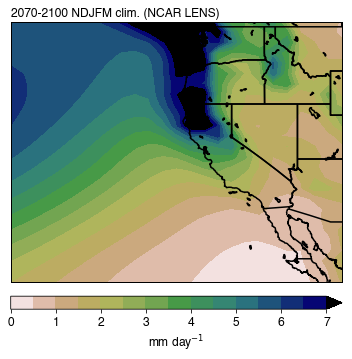

In [88]:
fontsize=12
contour_levels = numpy.arange(0,7.1,0.5)

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)

map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=model_lat.min(),urcrnrlat=model_lat.max(),llcrnrlon=model_lon.min(),urcrnrlon=model_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
#map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(model_lon, model_lat)
xi,yi = map(lons, lats)

mp.rcParams['hatch.color'] = '0.5'
#pr_map = map.pcolormesh(xi, yi, hist_mmem_clim, cmap='RdBu', zorder=2, vmin=0, vmax=40, ax=ax, latlon=True)
pr_map = map.contourf(xi, yi, rcp_mmem_clim, \
                      cmap='gist_earth_r', zorder=2, \
                      levels=contour_levels, \
                      extend='max', \
                      ax=ax, latlon=True)
#pr_stipple = map.contourf(xi, yi, agreement_positive, colors='None', hatches=['..',None,'..'], levels=[-0.5,2.5,37.5,40.5], zorder=2)
#colors='none', levels=[0.0,0.05,1.0], hatches=['...',None], extend='lower')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
#cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal', extend='max')
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.text(s='2070-2100 NDJFM clim. (NCAR LENS)', x=0, y=1.01, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.tight_layout()
mp.savefig('rcp85_climatology_NDJFM_NCAR_LENS.pdf', transparent=True, bbox_inches='tight')

In [89]:
rcp_minus_hist = rcp_mmem_clim - hist_mmem_clim

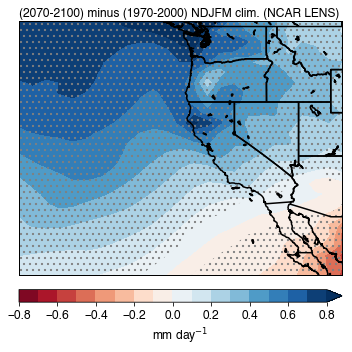

In [91]:
fontsize=12
contour_levels = numpy.arange(-0.8,0.81,0.1)

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)

map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=model_lat.min(),urcrnrlat=model_lat.max(),llcrnrlon=model_lon.min(),urcrnrlon=model_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
#map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(model_lon, model_lat)
xi,yi = map(lons, lats)

mp.rcParams['hatch.color'] = '0.5'
#pr_map = map.pcolormesh(xi, yi, hist_mmem_clim, cmap='RdBu', zorder=2, vmin=0, vmax=40, ax=ax, latlon=True)
pr_map = map.contourf(xi, yi, rcp_minus_hist, \
                      cmap='RdBu', zorder=2, \
                      levels=contour_levels, \
                      extend='max', \
                      ax=ax, latlon=True)
pr_stipple = map.contourf(xi, yi, pvals_array, colors='None', hatches=['..',None], levels=[0,0.01], zorder=2)
#colors='none', levels=[0.0,0.05,1.0], hatches=['...',None], extend='lower')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
#cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal', extend='max')
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.text(s='(2070-2100) minus (1970-2000) NDJFM clim. (NCAR LENS)', x=0, y=1.01, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.tight_layout()
mp.savefig('rcp85_minus_historical_climatology_NDJFM_NCAR_LENS.pdf', transparent=True, bbox_inches='tight')

# Calculate e-o-c anomalies

In [10]:
eoc_anoms_NDJFM = [rcp_NDJFM_clim[i] - hist_NDJFM_clim[i] for i in range(len(hist_NDJFM_clim))]
print(eoc_anoms_NDJFM[0].shape)

(26, 25)


# Calculate agreement plot

In [11]:
agreement_positive = numpy.zeros((model_lat.size, model_lon.size))
for j in range(model_lat.size):
    for k in range(model_lon.size):
        agreement_positive[j,k] = numpy.sum( [eoc_anoms_NDJFM[model][j,k]>0 for model in range(len(eoc_anoms_NDJFM)) ] )

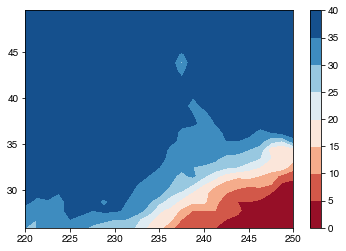

In [12]:
cf = mp.contourf(model_lon, model_lat, agreement_positive, cmap='RdBu')
mp.colorbar(cf)

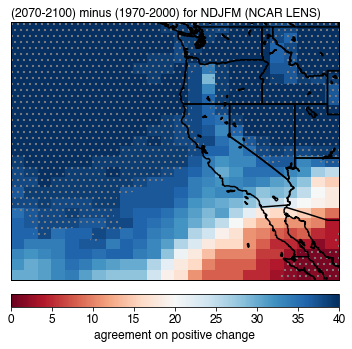

In [13]:
fontsize=12
contour_levels = numpy.arange(0,2.21,0.1)

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)

map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=model_lat.min(),urcrnrlat=model_lat.max(),llcrnrlon=model_lon.min(),urcrnrlon=model_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
# draw parallels and meridians. # labels[left, right, top, bottom]
#map.drawparallels(numpy.arange(-80.,81.,5.), labels=[1,0,0,0], dashes=[3,2], fontsize=fontsize, color='0')
#map.drawmeridians(numpy.arange(-180.,181.,10.), labels=[0,0,0,1], dashes=[3,2], fmt=format_every_other, fontsize=fontsize, color='0')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
#map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(model_lon, model_lat)
xi,yi = map(lons, lats)

mp.rcParams['hatch.color'] = '0.5'
pr_map = map.pcolormesh(xi, yi, agreement_positive, cmap='RdBu', zorder=2, vmin=0, vmax=40, ax=ax, latlon=True)
pr_stipple = map.contourf(xi, yi, agreement_positive, colors='None', hatches=['..',None,'..'], levels=[-0.5,2.5,37.5,40.5], zorder=2)
#colors='none', levels=[0.0,0.05,1.0], hatches=['...',None], extend='lower')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
#cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal', extend='max')
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('agreement on positive change', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.text(s='(2070-2100) minus (1970-2000) for NDJFM (NCAR LENS)', x=0, y=1.01, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.tight_layout()
mp.savefig('agreement_plot_NDJFM_LENS.pdf', transparent=True, bbox_inches='tight')

# Save all data in NetCDF format

In [54]:
PRECT_lon = model_lon
PRECT_lat = model_lat

In [93]:
# save hist clim
filename = 'LENS_climatologies_anomalies_agreement.nc'

ncfile = netCDF4.Dataset(filename, 'w', format='NETCDF4')

lat_dim = ncfile.createDimension('lat', PRECT_lat.size)
lon_dim = ncfile.createDimension('lon', PRECT_lon.size)

lat_var = ncfile.createVariable('lat', 'f4', ('lat',))
lon_var = ncfile.createVariable('lon', 'f4', ('lon',))
lat_var[:] = PRECT_lat
lon_var[:] = PRECT_lon
lat_var.units = 'degrees_north'
lon_var.units = 'degrees_east'

hist_clim_var = ncfile.createVariable('hist_clim', 'f4', ('lat','lon'))
hist_clim_var[:] = hist_mmem_clim
hist_clim_var.units = 'mm day-1'
hist_clim_var.description = 'Historical climatology for NDJFM during 1970-2000, calculated from monthly data'

rcp_clim_var = ncfile.createVariable('rcp_clim', 'f4', ('lat','lon'))
rcp_clim_var[:] = rcp_mmem_clim
rcp_clim_var.units = 'mm day-1'
rcp_clim_var.description = 'RCP8.5 climatology for NDJFM during 2070-2100, calculated from monthly data'

rcp_minus_hist_var = ncfile.createVariable('rcp_minus_hist', 'f4', ('lat','lon'))
rcp_minus_hist_var[:] = rcp_minus_hist
rcp_minus_hist_var.units = 'mm day-1'
rcp_minus_hist_var.description = 'RCP8.5 minus historical climatologies (2070-2100 minus 1970-2000) for NDJFM, calculated from monthly data'

ttest_pvals_var = ncfile.createVariable('ttest_pvals', 'f4', ('lat','lon'))
ttest_pvals_var[:] = pvals_array
ttest_pvals_var.units = 'unitless'
ttest_pvals_var.description = 'P-values from a t-test on the difference of the mean of independent samples (scipy.stats.ttest_ind()) with unequal variances'

agreement_var = ncfile.createVariable('agreement', 'f4', ('lat','lon'))
agreement_var[:] = agreement_positive
agreement_var.units = 'number of ensemble members (out of 40)'
agreement_var.description = 'Number of ensemble members that agrees on a positive end-of-century change'

ncfile.history = 'Created ' + time.ctime(time.time())
ncfile.close()
print(filename, "saved")

LENS_climatologies_anomalies_agreement.nc saved
